# Visualization & EDA: Zomato Dataset

In [2]:
# Installing the required packages
! pip install sweetviz &> /dev/null                             # Package for some sweet visualizations

In [3]:
# Let us import the required package
import seaborn as sns                               # Importing seaborn for visualization
import pandas as pd                                 # Importing pandas
import numpy as np                                  # Importing numpy
%matplotlib inline
import warnings                                     # Importing package to toggle warnings
import IPython                                      # Importing ipython for displaying html files in the notebook

# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Hide Warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
<ipython-input-3-d3fbbed3fe53>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling`

In [5]:
# Reading the file
df = pd.read_csv("https://raw.githubusercontent.com/anishmahapatra/Zomato-Data-Visualization/main/data/zomato.csv", encoding = "ISO-8859-1")    # Reading file zomato.csv

In [6]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

In [7]:
# Reading country code
countryDf = pd.read_csv("https://raw.githubusercontent.com/anishmahapatra/Zomato-Data-Visualization/main/data/Country-Code.csv")

In [8]:
# Merging the zomato data and Country data
newdf = pd.merge(df, countryDf, on = 'Country Code')

In [9]:
# Let's view a summary of the dataset now
print(newdf.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

The above output represents the data types and the column names of zomato data

#Missing value handling

In [10]:

newdf.columns[newdf.isna().any()].tolist()

['Cuisines']

cuisines column has null values

In [15]:
newddf = newdf.dropna()

In [18]:
newddf.columns[newddf.isna().any()].tolist()

[]

#Exploratory Data Analysis (EDA)

#Sweetviz

In [27]:
import sweetviz as sv

In [24]:
my_report = sv.analyze(newddf)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#PANDAS Profiling

In [28]:
pip install ydata-profiling

  Using cached pydantic-2.6.4-py3-none-any.whl (394 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.14
    Uninstalling pydantic-1.10.14:
      Successfully uninstalled pydantic-1.10.14
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataprep 0.4.5 requires pydantic<2.0,>=1.6, but you have pydantic 2.6.4 which is incompatible.


In [29]:
from ydata_profiling import ProfileReport

In [30]:
profile = ProfileReport(newddf, title="Profiling Report")

In [31]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
import plotly.express as px

<Axes: >

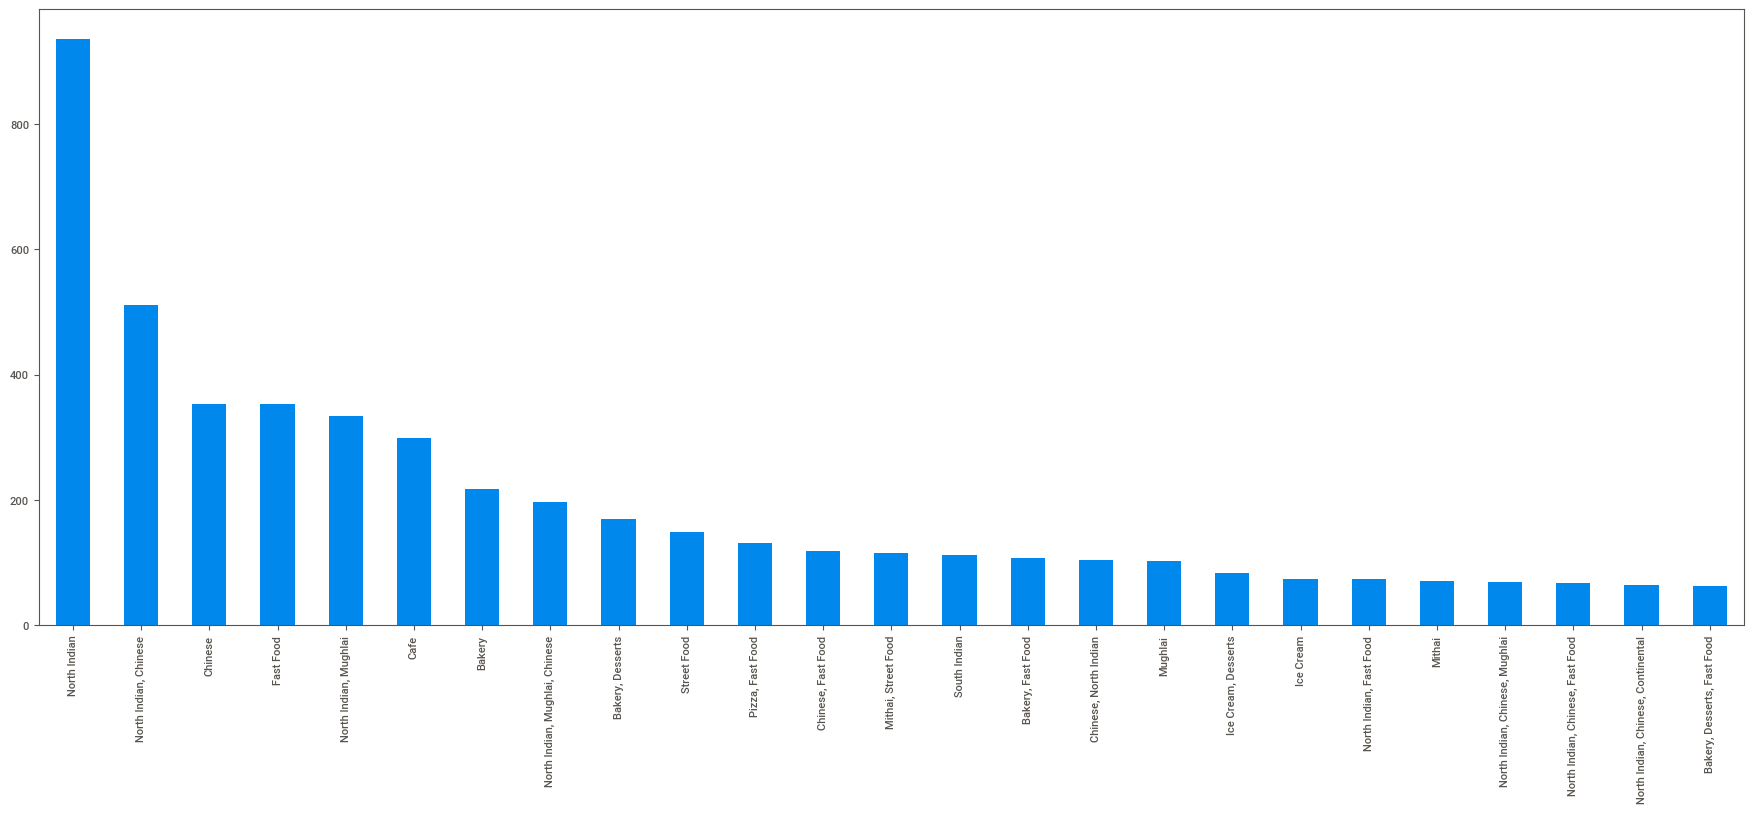

In [33]:
# Plotting the most common cuisines
newddf['Cuisines'].value_counts().head(25).plot(kind='bar', figsize = (22,8))

<Axes: title={'center': 'Top 15 Restaurants with maximum outlets'}, ylabel='Restaurant Name'>

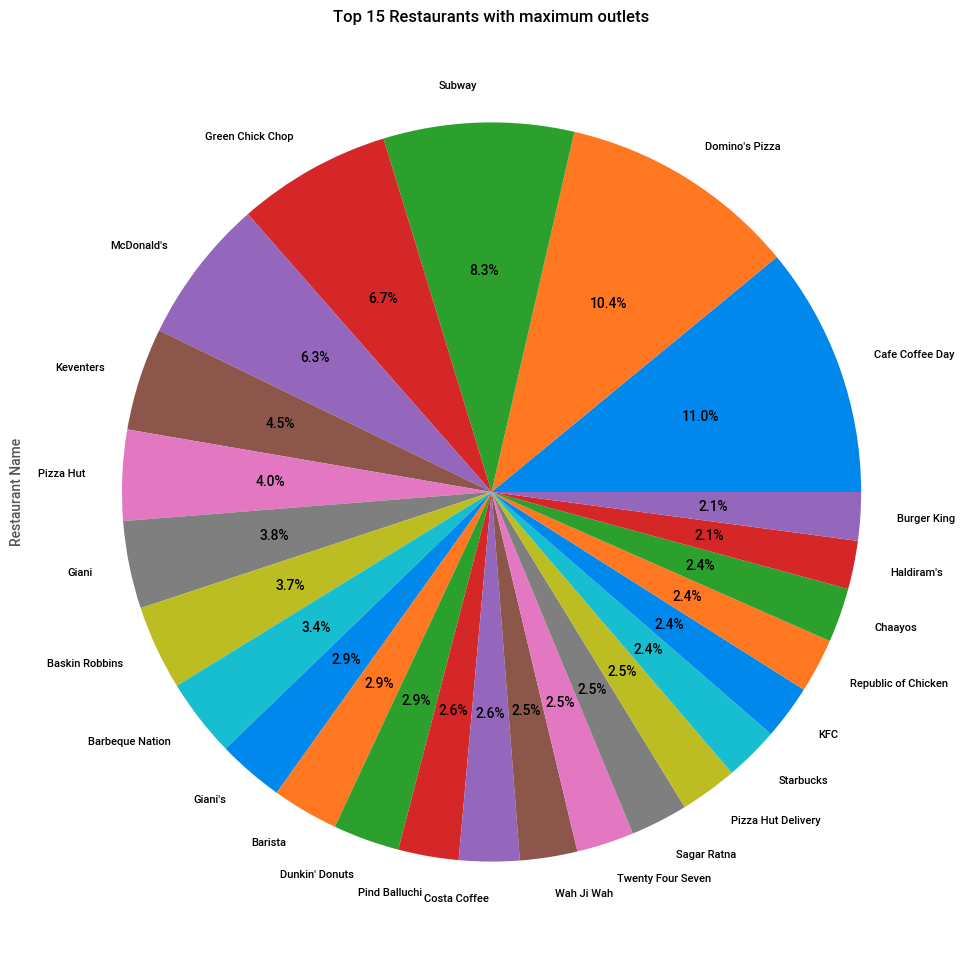

In [34]:
# Plotting pie chart with title and float with 1 decimal points
newddf['Restaurant Name'].value_counts().head(25).plot(kind='pie',figsize=(12,12), title="Top 15 Restaurants with maximum outlets", autopct='%1.1f%%')